# Session 2: Comprehension - LDA




### Import libraries

To start off, you will import the required libraries for visualising and analysing the text data.


In [1]:
# Import libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# LDA

#1. Load the data

##### Method 1 - Google Colab
- Run the code block below if you're using Google colab for this demonstration and have uploaded the papers.csv file in your Google Drive
- Else, skip this part and move to the next cell block and run it in case you're using Jupyter 

In [2]:
import pandas as pd
imdb = pd.read_csv('IMDB_reviews_LDA.csv').sample(6000, random_state=123)
imdb.head()

review sentiment
11872  this movie was beyond awful it was a pimple on...  negative
40828  as of this writing john carpenters halloween i...  positive
36400  i must admit a slight disappointment with this...  positive
5166   oh dear the bbc is not about to be knocked off...  negative
30273  its a totally average film with a few semialri...  negative

# 2. EDA

Question 1: Which of the following can be treated as potential stop words from the word cloud results of the IMDb reviews? (Note: More than one option may be correct.)

Hint: High frequent words that don't add much value to the context can be considered stopwords.

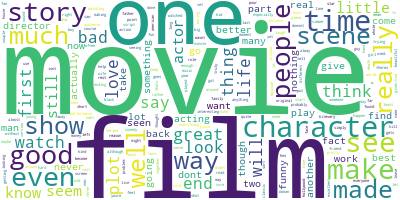

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(imdb['review'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:
long_string

'this movie was beyond awful it was a pimple on the as of the movie industry i know that every movie cant be a hit or for that matter even average but the responsible parties that got together for this epic dud should have been able to see that they had a ticking time bomb on their hands i cant help but think that the cast would get together in between scenes and console each other for being in such a massive heap of dung i can hear it now you getting paid nope you i understand that this flick was more than likely made on a shoe string budget but even with that taken into account it still couldve been better you wait for the appearance of a monstercreature and when you finally see it its a big yawnim so mad at myself for spending a 107 on this stinker,as of this writing john carpenters halloween is nearing its 30th anniversary it has since spawned 7 sequels a remake a whole mess of imitations and every year around halloween when they do those top 10 scariest movies lists its always on 

# 3. LDA analysis

#### 3.1 Import libraries

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 3.2 Tokenization

In [6]:
# Tokenizing sentences into words
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

#### 3.3 Stopwords removal

In [8]:
stop_words = stopwords.words('english')
stop_words.extend(['movie', 'film', 'one', 'even'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [9]:
data = imdb.review.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:10])
print(data_words[1:2][0][:10])

['beyond', 'awful', 'pimple', 'industry', 'know', 'every', 'cant', 'hit', 'matter', 'average']
['writing', 'john', 'carpenters', 'halloween', 'nearing', 'th', 'anniversary', 'since', 'spawned', 'sequels']


#4. Term document freqency

Question 2: How many words have a frequency of >1 for the first document example in the corpus of document examples? 

In [11]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View the term frequency of first 10 features of the first document
print(corpus[:1][0][:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [12]:
# Code to find the number of features in first document that have a frequency > 1

count=0

for feature,frequency in corpus[0]:
  if frequency>1:
    count=count+1

print(count)


3


#5. Training the model
Question 3:  In what range does the perplexity score fall for your LDA model (eta = 0.01)?

Question 4:  Suppose you decrease the value of the eta while training the LDA model. How does the value of the log perplexity change?

In [18]:
from pprint import pprint
import numpy as np 

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,alpha='asymmetric',eta=0.001)

### 6. Model Output

In [19]:
doc_lda = lda_model[corpus]
for i in range(len(texts)):
  docbow = corpus[i]
  doc_topics = lda_model.get_document_topics(docbow,minimum_probability=0.0)
  doc_topic_prob = np.array([v[1] for v in doc_topics])
  print('review:',i+1,', dominant topic:',np.argmax(doc_topic_prob)+1)

review: 1 , dominant topic: 2
review: 2 , dominant topic: 7
review: 3 , dominant topic: 1
review: 4 , dominant topic: 2
review: 5 , dominant topic: 1
review: 6 , dominant topic: 2
review: 7 , dominant topic: 8
review: 8 , dominant topic: 7
review: 9 , dominant topic: 1
review: 10 , dominant topic: 2
review: 11 , dominant topic: 1
review: 12 , dominant topic: 8
review: 13 , dominant topic: 2
review: 14 , dominant topic: 3
review: 15 , dominant topic: 10
review: 16 , dominant topic: 1
review: 17 , dominant topic: 2
review: 18 , dominant topic: 7
review: 19 , dominant topic: 9
review: 20 , dominant topic: 7
review: 21 , dominant topic: 1
review: 22 , dominant topic: 1
review: 23 , dominant topic: 2
review: 24 , dominant topic: 7
review: 25 , dominant topic: 2
review: 26 , dominant topic: 7
review: 27 , dominant topic: 1
review: 28 , dominant topic: 10
review: 29 , dominant topic: 7
review: 30 , dominant topic: 2
review: 31 , dominant topic: 3
review: 32 , dominant topic: 7
review: 33 , do

### 8. Model Evaluation

In [20]:
# Calculate and return per-word likelihood bound, using a chunk of documents as evaluation corpus.
# Also output the calculated statistics, including the perplexity=2^(-bound), to log at INFO level.

perplexity_score = lda_model.log_perplexity(corpus)
print('Perplexity score: ', perplexity_score)

Perplexity score:  -68.24377460886981


In [21]:
-15.27 > -68.24

True